In [1]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Лабораторная работа 4.1

## Задача Штурма-Лиувилля на собственные значения

### Постановка задач

Задачи на собственные значения - это краевые задачи для системы $p$ уравнений первого порядка

$$ u'(x) = f(x, u; \lambda_1, \lambda_2, \dots, \lambda_q), $$

$$ u(x) = \{u_1, u_2, \dots, u_p\}, \space f = \{f_1, f_2, \dots, f_p\}, $$

в которых правые части зависят от параметров $\lambda_r$, значения которых неизвестны и должны быть определены из самой задачи; число дополнительных (краевых) условий соответственно равно $p + q$. Функции $u_k (x)$, $1 \leq k \leq p$, и значения параметров $\lambda_r$, $1 \leq r \leq q$, удовлетворяющие всем уравнениям и краевым условиям, называются \textit{собственными функциями} и \textit{собственными значениями} задачи.

### Частица в поле с потенциалом Тоды

Уравниение движения частицы в поле с потенциалом Тоды:

$$ \ddot x = 1 - e^x. $$

Это уравнение можно трактовать как движение частицы в поле с потенциалом $U(x) = e^x - x$.

Необходимо численно найти все периодические решения, удовлетворяющие следующим граничным условиям:

$$ x(0) = x(120) = 0, \space \dot x (0) = \dot x (120) = A$$

и дополнительному условию $A \geq 10$.

Эту задачу можно представить в следующем виде, в котором она и будет решаться:

$
\begin{align}
    \begin{cases}
        \dot y_1 = y_2 \\
        \dot y_2 = 1 - e^{y_1} \\
    \end{cases}
\end{align}
$

$
\begin{align}
    \begin{cases}
        y_1 (0) = 0 \\
        y_2 (0) = A \\
    \end{cases}
\end{align}
$

### Метод стрельбы

Пусть дана краевая задача:

$$ y'' = f(x, y, y'), \space 0 < x < 1, $$

$$ y(0) = Y_0, \space y(1) = Y_1. $$

Рассмотрим задачу Коши:

$$ y'' = f(x, y, y'), \space 0 < x < 1, $$

$$ y(0) = Y_0, $$

$$ y'(0) = \alpha, $$

где $Y_0$ - ордината точки $(0, Y_0)$, из которой выходит интегральная кривая; $\alpha$ - пристрелочный параметр. При $x = 1$ решение $y(x, \alpha)$ зависит только от $\alpha$:

$$ y(x, \alpha)|_{x=1} = y(1, \alpha). $$

Можно найти параметр $\alpha = \alpha^*$, при котором интегральная кривая, выходящая из точки $(0, Y_0)$, попадает в точку $(1, Y_1)$:

$$ y(1, \alpha) = Y_1. $$

Таким образом, задача свелась к следующей:

$$ F(\alpha) = 0, $$

где $F(\alpha) = y(1, \alpha) - Y_1.$

$$ y''(x, \alpha) = f(x, y(x, \alpha), y'(x, \alpha)), $$

$$ \frac{\partial}{\partial \alpha} y''(x, \alpha) = \frac{\partial}{\partial y} f(x, y(x, \alpha), y'(x, \alpha)) \frac{\partial y}{\partial \alpha} + \frac{\partial}{\partial y'} f(x, y(x, \alpha), y'(x, \alpha)) \frac{\partial y'}{\partial \alpha}. $$

$$ \left(\frac{\partial y}{\partial \alpha}\right)'' = \frac{\partial f}{\partial y} \frac{\partial y}{\partial \alpha} + \frac{\partial f}{\partial y'} \frac{d}{dx} \frac{\partial y}{\partial \alpha}. $$

Пусть $u = \frac{\partial y}{\partial \alpha}$. Тогда она определяется линейным уравнением в вариациях

$$ u'' = \frac{\partial f}{\partial y} u + \frac{\partial f}{\partial y'} u', $$

для которого необходимо задать начальные условия:

$ u(0) = 0, \space u'(0) = 1. $

C:\Users\MSI\AppData\Local\Temp\ipykernel_23860\2768359769.py:6: RuntimeWarning: overflow encountered in exp
  dy2_dt = 1 - np.exp(y1)
C:\Users\MSI\AppData\Local\Temp\ipykernel_23860\2768359769.py:8: RuntimeWarning: overflow encountered in exp
  du2_dt = -np.exp(y1) * u1
C:\Users\MSI\AppData\Local\Temp\ipykernel_23860\2768359769.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  du2_dt = -np.exp(y1) * u1
C:\Users\MSI\anaconda3\Lib\site-packages\scipy\integrate\_ivp\rk.py:522: RuntimeWarning: invalid value encountered in divide
  err3 = np.dot(K.T, self.E3) / scale
C:\Users\MSI\anaconda3\Lib\site-packages\scipy\integrate\_ivp\rk.py:521: RuntimeWarning: invalid value encountered in divide
  err5 = np.dot(K.T, self.E5) / scale
C:\Users\MSI\anaconda3\Lib\site-packages\scipy\integrate\_ivp\rk.py:63: RuntimeWarning: overflow encountered in multiply
  dy = np.dot(K[:s].T, a[:s]) * h
C:\Users\MSI\AppData\Local\Temp\ipykernel_23860\2768359769.py:8: RuntimeWarning: overflow enc

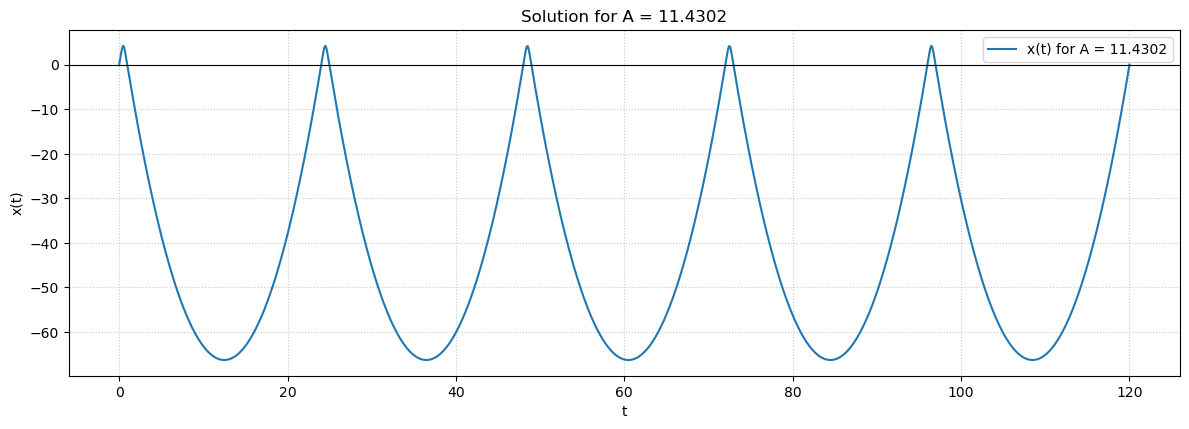

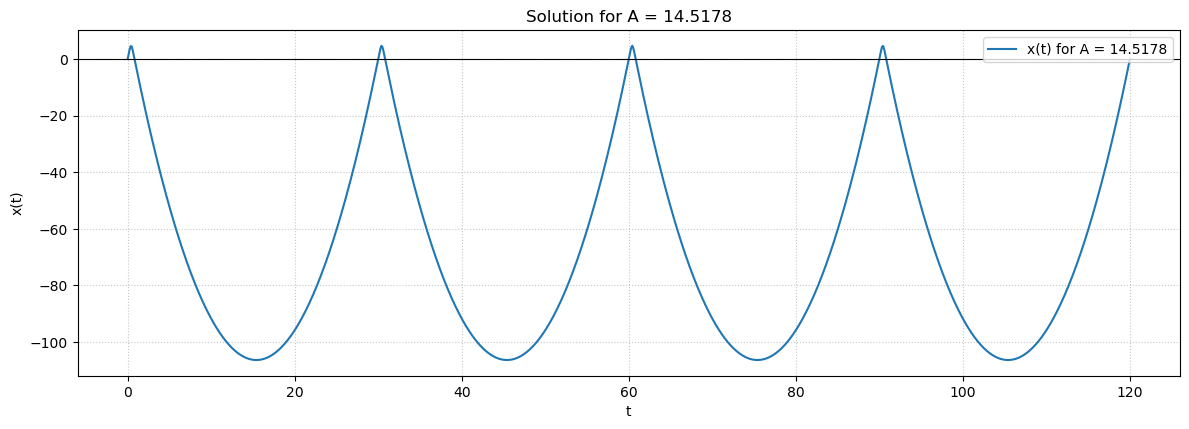

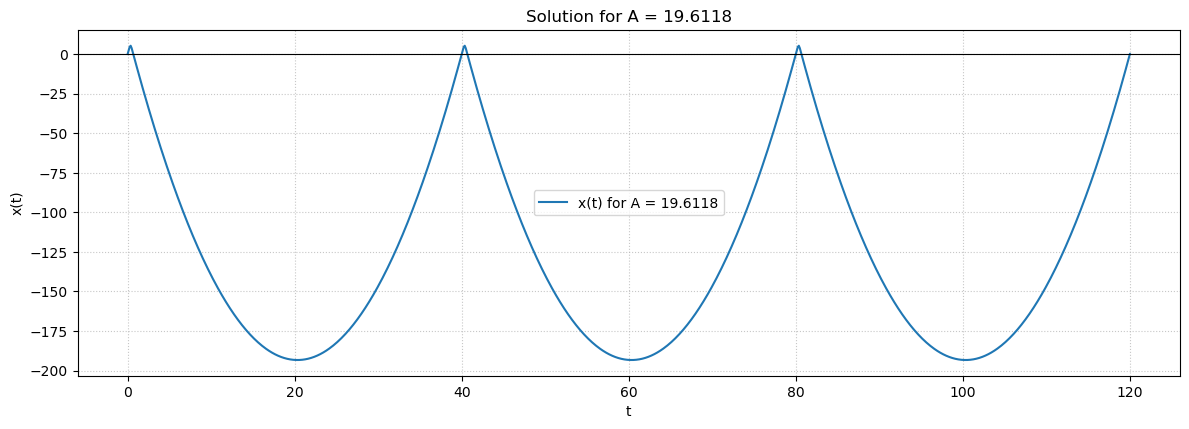

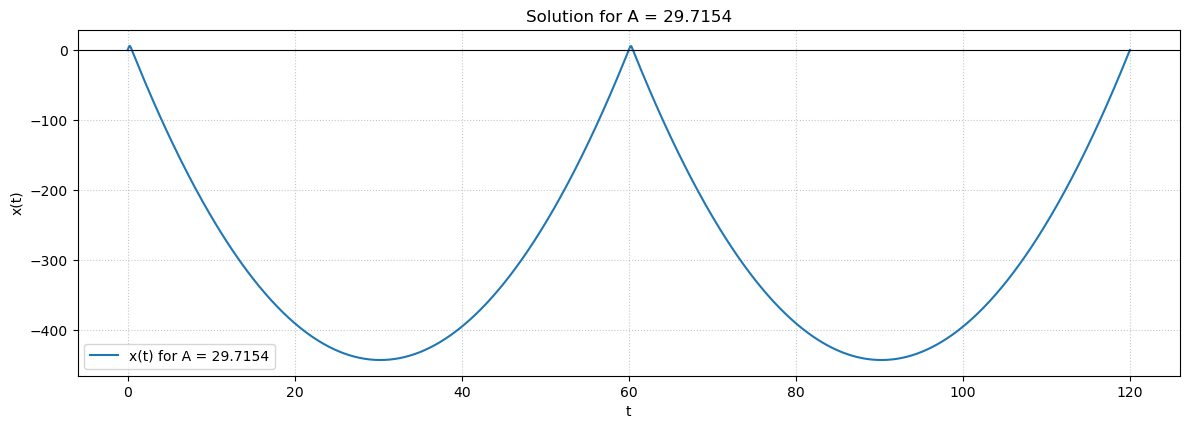

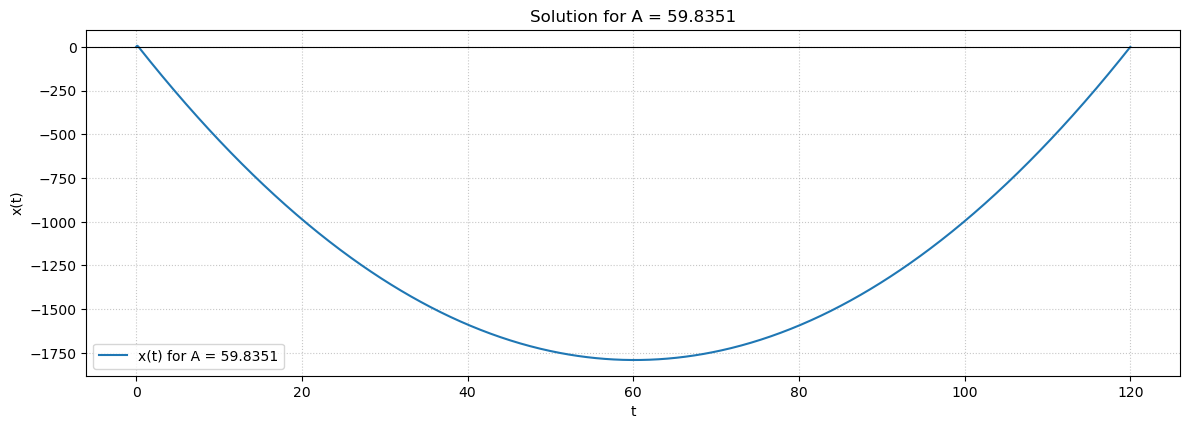

In [4]:
T_FINAL = 120.0

def ode_system(t, Y, A_param_dummy):
    y1, y2, u1, u2 = Y
    dy1_dt = y2
    dy2_dt = 1 - np.exp(y1)
    du1_dt = u2
    du2_dt = -np.exp(y1) * u1
    return [dy1_dt, dy2_dt, du1_dt, du2_dt]


def solve_odes_for_A(A_val):
    Y0 = [0, A_val, 0, 1]
    
    sol = solve_ivp(ode_system, [0, T_FINAL], Y0,
                    dense_output=True, rtol=1e-10, atol=1e-12, method='DOP853', args=(A_val,))
    
    y1_T = sol.y[0, -1]
    y2_T = sol.y[1, -1]
    u1_T = sol.y[2, -1]
    
    return y1_T, y2_T, u1_T, sol

# Scan for A values in [10, 80]
A_values_scan = np.linspace(10, 80, 1500)
y1_at_T_scan = []
y2_minus_A_at_T_scan = []

for i, A_s in enumerate(A_values_scan):
    y1_T, y2_T, _, _ = solve_odes_for_A(A_s)
    y1_at_T_scan.append(y1_T)
    y2_minus_A_at_T_scan.append(y2_T - A_s)

y1_at_T_scan = np.array(y1_at_T_scan)
y2_minus_A_at_T_scan = np.array(y2_minus_A_at_T_scan)

# Coarse root estimation
initial_guesses_A = []
for i in range(len(A_values_scan) - 1):
    if not np.isnan(y1_at_T_scan[i]) and not np.isnan(y1_at_T_scan[i+1]):
        if np.sign(y1_at_T_scan[i]) != np.sign(y1_at_T_scan[i+1]):

            y1_i = y1_at_T_scan[i]
            y1_i1 = y1_at_T_scan[i+1]
            A_i = A_values_scan[i]
            A_i1 = A_values_scan[i+1]
            A_guess = A_i - y1_i * (A_i1 - A_i) / (y1_i1 - y1_i)

            initial_guesses_A.append(A_guess)

# Newton method for fine root estiomation
found_eigenvalues_A_solutions = []
max_newton_iter = 25
tol_newton = 1e-10
tol_final_y1 = 1e-8
tol_final_y2_A = 1e-8
uniqueness_tol = 1e-4

for A_k_initial in initial_guesses_A:
    A_current = A_k_initial
    
    if not (A_values_scan[0] <= A_current <= A_values_scan[-1]):
        continue

    for iter_count in range(max_newton_iter):
        y1_T, _, u1_T, _ = solve_odes_for_A(A_current)
        
        A_next = A_current - y1_T / u1_T
        
        if abs(A_next - A_current) < tol_newton:
            A_current = A_next
            break 
        A_current = A_next

    y1_T_final, y2_T_final, _, sol_final = solve_odes_for_A(A_current)

    residual_y1 = abs(y1_T_final)
    residual_y2_A = abs(y2_T_final - A_current)

    if residual_y1 < tol_final_y1 and residual_y2_A < tol_final_y2_A:
        is_unique = True
        for A_found, _ in found_eigenvalues_A_solutions:
            if abs(A_found - A_current) < uniqueness_tol:
                is_unique = False
                break
        if is_unique:
            found_eigenvalues_A_solutions.append((A_current, sol_final))

found_eigenvalues_A_solutions.sort(key=lambda x: x[0])

# Plot solutions
for i, (A_val, sol) in enumerate(found_eigenvalues_A_solutions):
    t_plot = np.linspace(0, T_FINAL, 1000)
    y_plot = sol.sol(t_plot) 
    x_plot = y_plot[0]
    x_dot_plot = y_plot[1]
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2,1,1)
    plt.plot(t_plot, x_plot, label=f'x(t) for A = {A_val:.4f}')
    plt.title(f'Solution for A = {A_val:.4f}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.8)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### Метод дополненного вектора

Разностную собственную функцию $y = \{y_0, y_1, \dots, y_N\}$ можно считать вектором в $(N + 1)$-мерном пространстве. Увеличивая размерность пространства на единицу, рассмотрим собственное значение как новую компоненту этого вектора, $y_{N+1} = \lambda$. Новый вектор $Y = \{y_0, y_1, \dots, y_N , y_{N+1}\}$ назовем \textit{дополненным}. Относительно компонент дополненного вектора алгебраическая система перепишется в каноническом виде

$$ F_k(y_0, y_1, \dots, y_N, y_{N+1}) = 0, \space 0 \leq k \leq N + 1. $$

Эта система нелинейна, даже если исходная задача была линейной относительно $u(x)$. Решать её будем методом Ньютона. Линеаризуя, получим на каждой итерации систему уравнений

$$ \sum^{N + 1}_{p = 0} \frac{\partial F_k (Y^{(s)})}{\partial y_p} \delta y^{(s)}_p = -F_k(Y^{(s)}), \space 0 \leq k \leq N + 1, $$

линейную относительно приращений неизвестных $\delta y^{(s)} = y^{(s+1)}_p − y^{(s)}_p$. Если искомое решение алгебраической системы не особенное, т.е. в нем $\det (\partial F / \partial Y) \neq 0$, то при не слишком плохом нулевом приближении итерации быстро сходятся к разностному решению. Удовлетворительное нулевое приближение для итераций можно найти приближенными методами.

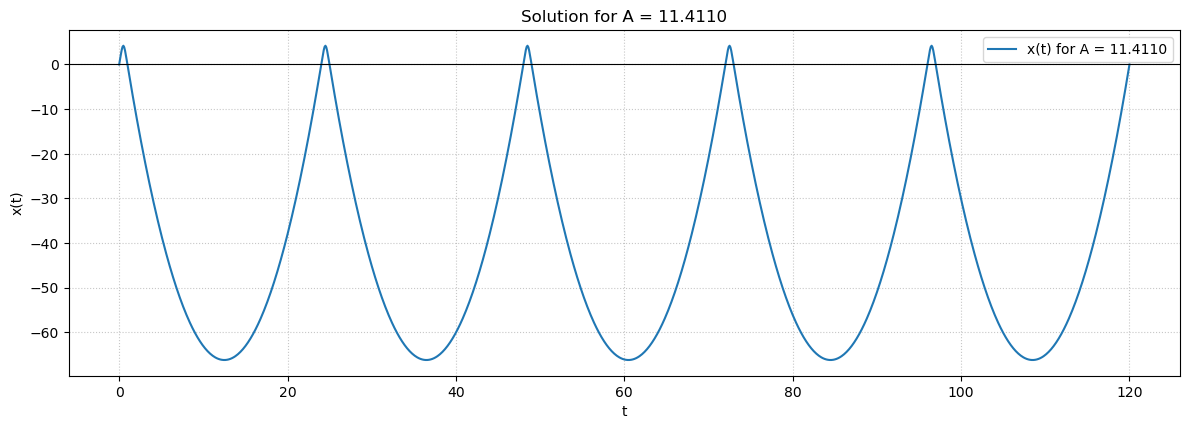

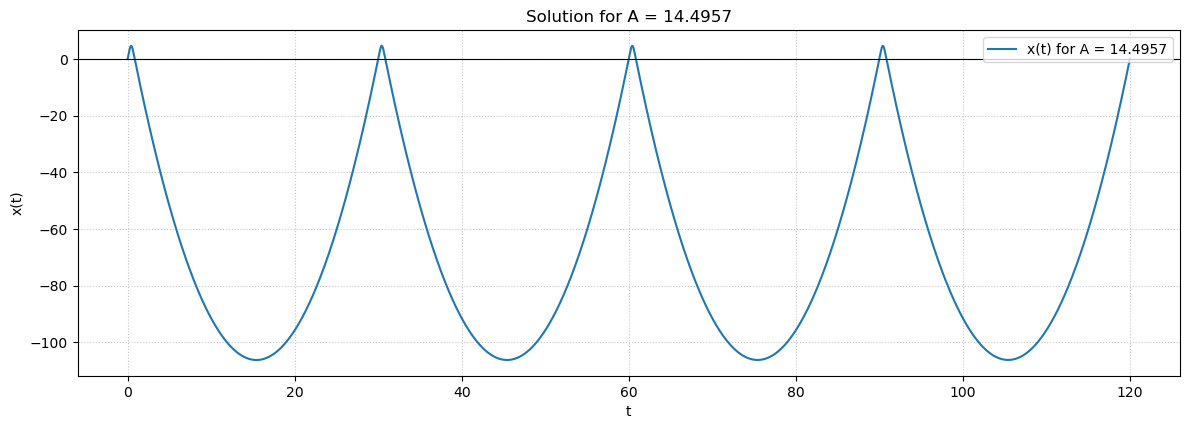

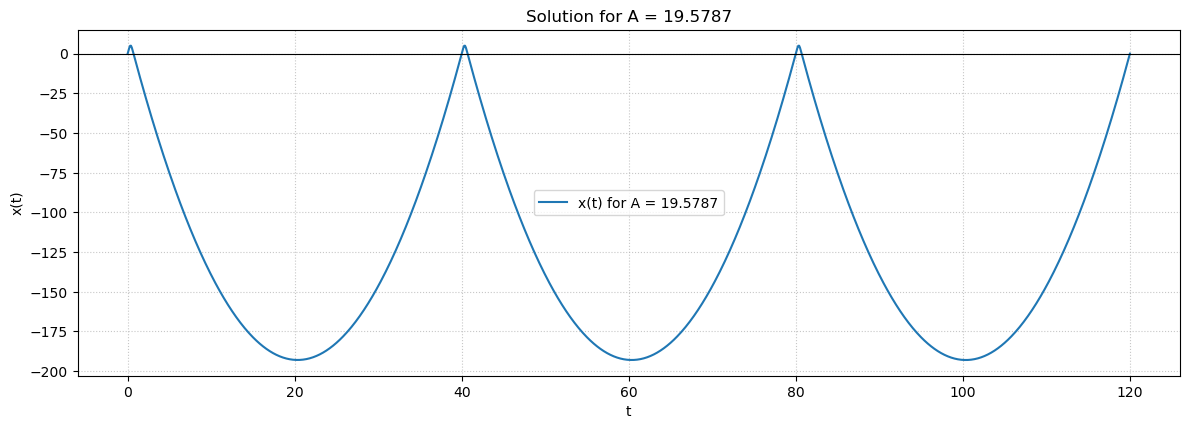

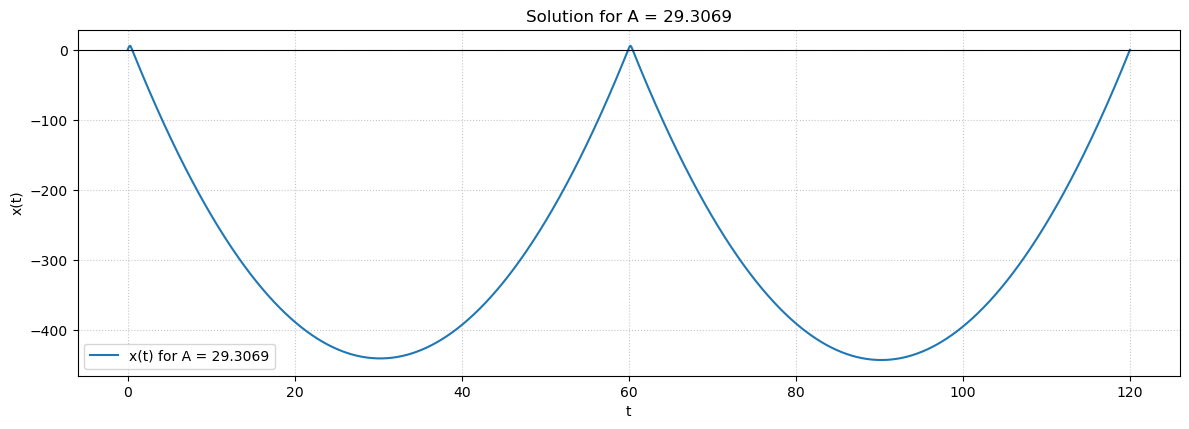

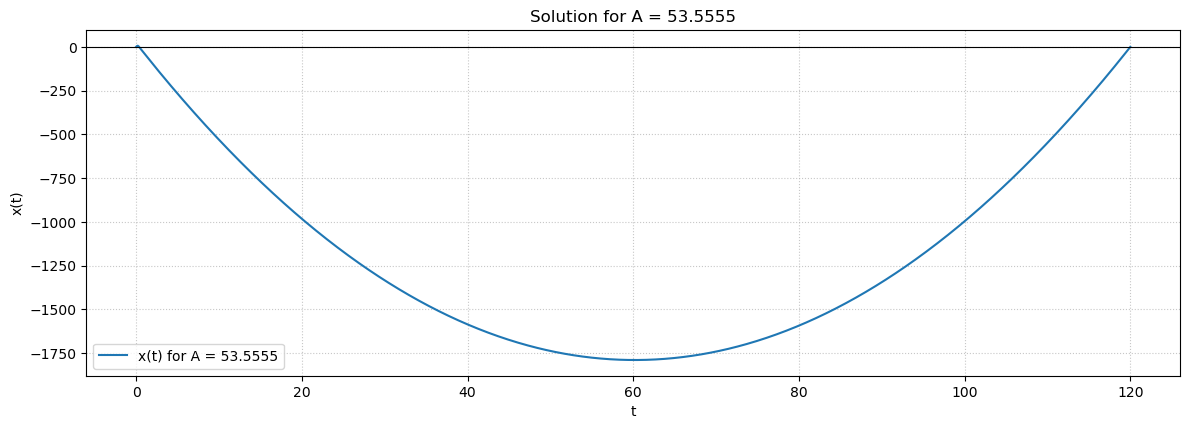

In [6]:
# Generate shooting method
T_FINAL_SHOOTING = 120.0

def ode_system_shooting(t, Y, A_param_dummy):
    y1, y2, u1, u2 = Y
    exp_y1_val = 0
    if y1 < 700: exp_y1_val = np.exp(y1)
    elif y1 >= 700: exp_y1_val = np.inf
    dy1_dt = y2
    dy2_dt = 1 - exp_y1_val
    du1_dt = 0
    du2_dt = 0
    return [dy1_dt, dy2_dt, du1_dt, du2_dt]

def solve_odes_for_A_shooting(A_val):
    Y0 = [0, A_val, 0, 1]
    sol = solve_ivp(ode_system_shooting, [0, T_FINAL_SHOOTING], Y0,
                    dense_output=True, rtol=1e-10, atol=1e-12, method='DOP853', args=(A_val,))
    return sol

# Method of augmented vector
T_FINAL_AUG = 120.0

def calculate_F_vector(Y_input, N_intervals, h, N_pts, M_system):
    F_vec = np.zeros(M_system)
    x_vals_F = Y_input[0:N_pts]

    for j in range(N_intervals):
        xj, xj1 = Y_input[j], Y_input[j+1]
        vj, vj1 = Y_input[N_pts+j], Y_input[N_pts+j+1]
        F_vec[j] = xj1 - xj - (h/2) * (vj1 + vj)

    for j in range(N_intervals):
        idx_F = N_intervals + j
        xj, xj1 = Y_input[j], Y_input[j+1]
        vj, vj1 = Y_input[N_pts+j], Y_input[N_pts+j+1]
        
        exp_xj, exp_xj1 = 0, 0
        if xj < 600: exp_xj = np.exp(xj)
        else: exp_xj = np.inf
        if xj1 < 600: exp_xj1 = np.exp(xj1)
        else: exp_xj1 = np.inf

        F_vec[idx_F] = vj1 - vj - (h/2) * ( (1-exp_xj1) + (1-exp_xj) )

    F_vec[2*N_intervals] = Y_input[0] 
    F_vec[2*N_intervals + 1] = Y_input[N_pts-1] 
    F_vec[2*N_intervals + 2] = Y_input[N_pts] - Y_input[2*N_pts] 
    return F_vec


def solve_toda_augmented(N_intervals, A_initial_guess,
                         initial_solution_object=None,
                         max_newton_iter=300, conv_tol_res=1e-6, conv_tol_dy=1e-6):
    N_pts = N_intervals + 1
    h = T_FINAL_AUG / N_intervals
    M_system = 2 * N_pts + 1
    Y_current = np.zeros(M_system)
    time_nodes = np.linspace(0, T_FINAL_AUG, N_pts)

    traj_guess = initial_solution_object.sol(time_nodes)
    Y_current[0:N_pts] = traj_guess[0, :]
    Y_current[N_pts:2*N_pts] = traj_guess[1, :]

    Y_current[2*N_pts] = A_initial_guess
    
    F_prev_norm = np.inf

    for iteration in range(max_newton_iter):
        F_vector = calculate_F_vector(Y_current, N_intervals, h, N_pts, M_system)
        norm_F_vector = np.linalg.norm(F_vector)
        
        F_prev_norm = norm_F_vector

        Jacobian = np.zeros((M_system, M_system))
        x_vals_iter = Y_current[0:N_pts]

        for j in range(N_intervals):
            Jacobian[j, j]         = -1.0; Jacobian[j, j+1]       =  1.0
            Jacobian[j, N_pts+j]   = -h/2; Jacobian[j, N_pts+j+1] = -h/2
        for j in range(N_intervals):
            idx_F_jac = N_intervals + j
            xj_jac, xj1_jac = Y_current[j], Y_current[j+1]
            exp_xj_jac, exp_xj1_jac = 0,0
            if xj_jac < 550: exp_xj_jac = np.exp(xj_jac)
            else: exp_xj_jac = np.inf
            if xj1_jac < 550: exp_xj1_jac = np.exp(xj1_jac)
            else: exp_xj1_jac = np.inf
            Jacobian[idx_F_jac, j]         = (h/2) * exp_xj_jac
            Jacobian[idx_F_jac, j+1]       = (h/2) * exp_xj1_jac
            Jacobian[idx_F_jac, N_pts+j]   = -1.0
            Jacobian[idx_F_jac, N_pts+j+1] =  1.0
        Jacobian[2*N_intervals, 0] = 1.0
        Jacobian[2*N_intervals + 1, N_pts-1] = 1.0
        Jacobian[2*N_intervals + 2, N_pts]     =  1.0
        Jacobian[2*N_intervals + 2, 2*N_pts] = -1.0

        delta_Y = solve(Jacobian, -F_vector, assume_a='gen')

        actual_damping_factor = 1.0
        max_abs_delta_xv = 0
        if len(delta_Y[0:2*N_pts]) > 0: max_abs_delta_xv = np.max(np.abs(delta_Y[0:2*N_pts]))
        
        max_allowed_change_xv = 5.0 

        if max_abs_delta_xv > 1e-10:
            if max_abs_delta_xv * actual_damping_factor > max_allowed_change_xv:
                calculated_damping = max_allowed_change_xv / max_abs_delta_xv
                actual_damping_factor = max(calculated_damping, 0.05)

        Y_current += actual_damping_factor * delta_Y
        
        applied_delta_Y_norm = np.linalg.norm(actual_damping_factor * delta_Y)
        current_A_val = Y_current[2*N_pts]
       
        if applied_delta_Y_norm < conv_tol_dy and norm_F_vector < conv_tol_res:
            final_F_vector = calculate_F_vector(Y_current, N_intervals, h, N_pts, M_system)
            norm_final_F = np.linalg.norm(final_F_vector)
            
            final_A = Y_current[2*N_pts]
            
            x_solution = Y_current[0:N_pts].copy()
            v_solution = Y_current[N_pts:2*N_pts].copy()
            
            v_at_T = v_solution[-1]
            residual_vT_A = abs(v_at_T - final_A)
            return x_solution, v_solution, final_A, True


# Main
A_guesses_from_shooting = [11.4, 14.5, 19.6, 29.7, 59.8]

N_chosen = 1200 

all_found_solutions_raw = []
uniqueness_A_tolerance = 1e-4

initial_solutions_shooting = {}
for A_g_idx, A_g_val in enumerate(A_guesses_from_shooting):
    sol_obj = solve_odes_for_A_shooting(A_g_val)
    initial_solutions_shooting[A_g_val] = sol_obj

for A_g_idx, A_g_val in enumerate(A_guesses_from_shooting):
    if A_g_val not in initial_solutions_shooting:
        continue

    sol_obj_guess = initial_solutions_shooting.get(A_g_val)
    x_res, v_res, A_res, converged_flag = solve_toda_augmented(
                                                               N_chosen, A_g_val,
                                                               initial_solution_object=sol_obj_guess,
                                                               max_newton_iter=400,
                                                               conv_tol_res=1e-7,
                                                               conv_tol_dy=1e-7     
                                                              )

    if converged_flag:
        is_A_unique = True
        for prev_A, _, _ in all_found_solutions_raw:
            if abs(prev_A - A_res) < uniqueness_A_tolerance:
                is_A_unique = False
                break
        if is_A_unique:
            all_found_solutions_raw.append((A_res, x_res, v_res))

final_filtered_solutions = []
# Sort before filtration
all_found_solutions_raw.sort(key=lambda item: item[0])

temp_unique_solutions = []
if all_found_solutions_raw:
    temp_unique_solutions.append(all_found_solutions_raw[0])
    for i in range(1, len(all_found_solutions_raw)):
        if abs(all_found_solutions_raw[i][0] - all_found_solutions_raw[i-1][0]) > uniqueness_A_tolerance:
            temp_unique_solutions.append(all_found_solutions_raw[i])

# Check if A >= 10
for A_val_f, x_vals_f, v_vals_f in temp_unique_solutions:
    if A_val_f >= 10.0:
        final_filtered_solutions.append((A_val_f, x_vals_f, v_vals_f))

# Plot found solutions
for i, (A_val, x_vals, v_vals) in enumerate(final_filtered_solutions):
    time_pts_plot = np.linspace(0, T_FINAL_AUG, N_chosen + 1)
    plt.figure(figsize=(12, 8))
    plt.subplot(2,1,1)
    plt.plot(time_pts_plot, x_vals, label=f'x(t) for A = {A_val:.4f}')
    plt.title(f'Solution for A = {A_val:.4f}')
    plt.xlabel('t'); plt.ylabel('x(t)')
    plt.grid(True, linestyle=':', alpha=0.7); plt.axhline(0, color='black', lw=0.8)
    plt.legend()
    plt.tight_layout()
    plt.show()